In [3]:
#15-2 소득 예측 모델 만들기

import pandas as pd
df = pd.read_csv('adult.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
#전처리하기

#타겟 변수 전처리
df['income'].value_counts(normalize = True)

income
<=50K    0.760718
>50K     0.239282
Name: proportion, dtype: float64

In [5]:
import numpy as np
df['income'] = np.where(df['income'] == '>50K', 'high', 'low')
df['income'].value_counts(normalize = True)

income
low     0.760718
high    0.239282
Name: proportion, dtype: float64

In [6]:
#불필요한 변수 제거하기

df = df.drop(columns = 'fnlwgt')

In [7]:
df_tmp = df[['sex']]
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     48842 non-null  object
dtypes: object(1)
memory usage: 381.7+ KB


In [8]:
df_tmp['sex'].value_counts()

sex
Male      32650
Female    16192
Name: count, dtype: int64

In [9]:
#df_tmp의 문자 타입 변수에 원핫 인코딩 적용
df_tmp = pd.get_dummies(df_tmp)
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   sex_Female  48842 non-null  bool 
 1   sex_Male    48842 non-null  bool 
dtypes: bool(2)
memory usage: 95.5 KB


In [10]:
df_tmp[['sex_Female', 'sex_Male']].head()

,sex_Female,sex_Male
0,False,True
1,False,True
2,False,True
3,False,True
4,True,False


In [11]:
target = df['income'] #income 추출

df = df.drop(columns = 'income') #income 제거
df = pd.get_dummies(df) #문자 타입 변수 원핫 인코딩

df['income'] = target #df에 target 삽입
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Columns: 108 entries, age to income
dtypes: bool(102), int64(5), object(1)
memory usage: 7.0+ MB


In [12]:
import numpy as np
df.info(max_cols = np.inf)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 108 columns):
 #    Column                                     Non-Null Count  Dtype 
---   ------                                     --------------  ----- 
 0    age                                        48842 non-null  int64 
 1    education_num                              48842 non-null  int64 
 2    capital_gain                               48842 non-null  int64 
 3    capital_loss                               48842 non-null  int64 
 4    hours_per_week                             48842 non-null  int64 
 5    workclass_?                                48842 non-null  bool  
 6    workclass_Federal-gov                      48842 non-null  bool  
 7    workclass_Local-gov                        48842 non-null  bool  
 8    workclass_Never-worked                     48842 non-null  bool  
 9    workclass_Private                          48842 non-null  bool  
 10   workclass_Self-emp-i

In [13]:
#adult 데이터 분할하기
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df,
                                     test_size = 0.3,
                                     stratify = df['income'],
                                     random_state = 1234) #난수 고정 

In [14]:
#train
df_train.shape

(34189, 108)

In [15]:
#test
df_test.shape

(14653, 108)

In [16]:
#train
df_train['income'].value_counts(normalize = True)

income
low     0.760713
high    0.239287
Name: proportion, dtype: float64

In [17]:
#test
df_test['income'].value_counts(normalize = True)

income
low     0.760732
high    0.239268
Name: proportion, dtype: float64

In [18]:
#의사결정나무 모델 만들기
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state = 1234,
                                  max_depth = 3) #나무 깊이

In [19]:
train_x = df_train.drop(columns = 'income') #예측 변수 추출
train_y = df_train['income'] #타겟 변수 추출

model = clf.fit(X = train_x, y = train_y) #모델 만들기

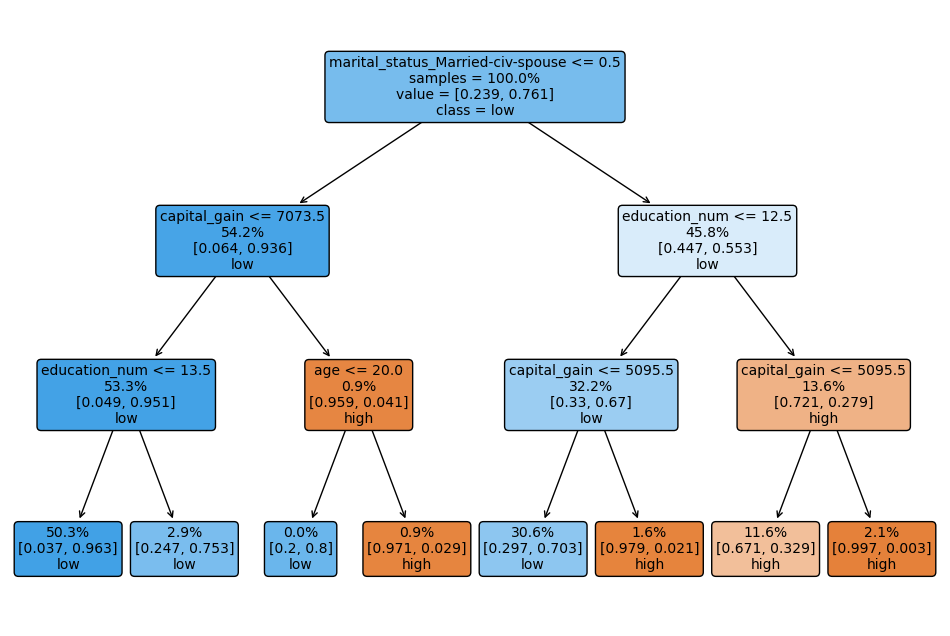

In [20]:
#모델 구조 살펴보기

import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi' : '100',
                     'figure.figsize' : [12,8]})
tree.plot_tree(model,
              feature_names = list(train_x.columns),
              class_names = ['high', 'low'],
              proportion = True,
              filled = True,
              rounded = True,
              impurity = False,
              label = 'root',
              fontsize = 10); #그래프 출력

In [21]:
#모델을 이용해 예측하기
test_x = df_test.drop(columns = 'income') #예측 변수 추출
test_y = df_test['income'] #타겟 변수 추출

In [22]:
#예측값 구하기
df_test['pred'] = model.predict(test_x)
df_test

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income,pred
11712,58,10,0,0,60,False,False,False,False,False,...,False,False,False,False,False,True,False,False,low,low
24768,39,10,0,0,40,False,False,False,False,True,...,False,False,False,False,False,False,False,False,low,low
26758,31,4,0,0,20,False,False,False,False,True,...,False,False,False,False,False,True,False,False,low,low
14295,23,9,0,0,40,False,False,False,False,True,...,False,False,False,False,False,True,False,False,low,low
3683,24,9,0,0,40,False,False,False,False,True,...,False,False,False,False,False,True,False,False,low,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11985,24,13,0,0,30,False,False,False,False,True,...,False,False,False,False,False,True,False,False,low,low
48445,35,13,10520,0,45,False,False,False,False,True,...,False,False,False,False,False,True,False,False,high,high
19639,41,9,0,0,40,False,False,False,False,True,...,False,False,False,False,False,True,False,False,high,low
21606,29,4,0,0,30,False,False,False,False,True,...,False,False,False,False,False,False,False,False,low,low


In [23]:
#성능 평가하기

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true = df_test['income'],
                            y_pred = df_test['pred'],
                            labels = ['high', 'low']) #클래스 배치 순서

In [24]:
plt.rcParams.update(plt.rcParamsDefault)

from sklearn.metrics import ConfusionMatrixDisplay
p = ConfusionMatrixDisplay(confusion_matrix = conf_mat,
                           display_labels = ('high', 'low')) #타겟 변수 클래스명

p.plot(cmap = 'Blues') #컬러맵 적용해 출력

In [25]:
#성능 평가 지표 구하기

import sklearn.metrics as metrics
metrics.accuracy_score(y_true = df_test['income'], 
                       y_pred = df_test['pred']) #예측값

0.8439227461953184

In [26]:
metrics.precision_score(y_true = df_test['income'],
                        y_pred = df_test['pred'],
                        pos_label = 'high') #관심 클래스

0.7557700377675199

In [27]:
#F1 score: recall과 precision의 조화평균, 0~1 사이의 값을 지니며 성능이 높을수록 1에 가까운 값이 됨
metrics.f1_score(y_true = df_test['income'],
                 y_pred = df_test['pred'],
                 pos_label = 'high') #관심 클래스

0.6116488368143997

In [28]:
#16-1 [] 이용하기

# 예제 데이터 만들기
import pandas as pd
df_raw = pd.read_csv('exam.csv')
df = df_raw.head(10)
df

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [29]:
#nclass 추출 : 데이터 프레임명 뒤에 []를 붙이고 변수명 입력하면 변수의 모든 행 추출함
df['nclass']

0    1
1    1
2    1
3    1
4    2
5    2
6    2
7    2
8    3
9    3
Name: nclass, dtype: int64

In [30]:
#nclass가 1인지 확인
df['nclass'] == 1

0     True
1     True
2     True
3     True
4    False
5    False
6    False
7    False
8    False
9    False
Name: nclass, dtype: bool

In [31]:
#nclass가 1이면 추출
df[df['nclass']==1]

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [32]:
#수학 점수가 80점 이상이면 추출
df[df['math']>=80]

,id,nclass,math,english,science
6,7,2,80,90,45
7,8,2,90,78,25


In [33]:
#nclass가 1이면서 수학 점수가 50점 이상
df[(df['nclass']==1) & (df['math']>=50)]

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60


In [34]:
#수학 점수가 50점 미만이거나 영어 점수가 50점 미만
df[(df['math'] < 50) | (df['english'] < 50)]

,id,nclass,math,english,science
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
8,9,3,20,98,15


In [35]:
#열 추출하기
df['id']

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: id, dtype: int64

In [36]:
df['nclass']

0    1
1    1
2    1
3    1
4    2
5    2
6    2
7    2
8    3
9    3
Name: nclass, dtype: int64

In [37]:
#여러 변수 동시 추출
df[['id', 'nclass']]

,id,nclass
0,1,1
1,2,1
2,3,1
3,4,1
4,5,2
5,6,2
6,7,2
7,8,2
8,9,3
9,10,3


In [38]:
#시리즈로 추출
df['id']

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: id, dtype: int64

In [39]:
#데이터 프레임으로 추출
df[['id']]

,id
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [40]:
#.을 이용해 변수 간단하게 추출하기
df.math

0    50
1    60
2    45
3    30
4    25
5    50
6    80
7    90
8    20
9    50
Name: math, dtype: int64

In [41]:
#조건을 충족하는 행에서 열 추출하기

#nclass가 1인 행의 math열
df[df['nclass'] ==1]['math']

0    50
1    60
2    45
3    30
Name: math, dtype: int64

In [42]:
#nclass가 1인 행의 math, english열
df[df['nclass'] == 1][['math','english']]

,math,english
0,50,98
1,60,97
2,45,86
3,30,98


In [43]:
#16-2 df.loc[] 이용하기, 인덱스(값의 위치를 나타낸 값)를 이용해 데이터 프레임의 행과 열 추출할 수 있음

df = pd.DataFrame({'var1' : [1, 2, 3],
                   'var2' : [4, 5, 6]})

df

,var1,var2
0,1,4
1,2,5
2,3,6


In [44]:
#인덱스 문자열 지정하기
df = pd.DataFrame({'var1' : [1, 2, 3],
                   'var2' : [4, 5, 6]},
                  index = ['kim', 'lee', 'park'])
df

,var1,var2
kim,1,4
lee,2,5
park,3,6


In [45]:
#인덱스 문자열을 지정해 행 추출하기

#kim행 추출
df.loc['kim']

var1    1
var2    4
Name: kim, dtype: int64

In [46]:
#여러 행 추출하기

#kim, park행 추출
df.loc[['kim', 'park']]

,var1,var2
kim,1,4
park,3,6


In [47]:
#인덱스 문자열을 지정해 열 추출하기

#lee행의 var1열 추출
df.loc['lee', 'var1']

2

In [48]:
#kim, lee행의 var2열 추출
df.loc[['kim', 'lee'], 'var2']

kim    4
lee    5
Name: var2, dtype: int64

In [49]:
#반드시 행 추출 기준도 함께 입력해야 함

#오류
df.loc[, 'var1']

SyntaxError: invalid syntax (184318445.py, line 4)

In [50]:
#모든 행 추출하려면 : 입력
df.loc[:, 'var1']

kim     1
lee     2
park    3
Name: var1, dtype: int64

In [51]:
# 인덱스 번호가 있는 데이터 프레임
df = df_raw.copy()
df

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [52]:
#0행 추출
df.loc[0]

id          1
nclass      1
math       50
english    98
science    50
Name: 0, dtype: int64

In [53]:
#2행 추출
df.loc[2]

id          3
nclass      1
math       45
english    86
science    78
Name: 2, dtype: int64

In [54]:
#행이 1개일 때 데이터 프레임 자료 구조 유지하기

#시리즈로 추출, 행이 1개면 자료 구조가 시리즈로 바뀜
df.loc[0]

id          1
nclass      1
math       50
english    98
science    50
Name: 0, dtype: int64

In [55]:
#데이터 프레임으로 추출
df.loc[[0]]

,id,nclass,math,english,science
0,1,1,50,98,50


In [56]:
#여러 행 추출하기

#1, 3, 5행 추출
df.loc[[0,3,5]]

,id,nclass,math,english,science
0,1,1,50,98,50
3,4,1,30,98,58
5,6,2,50,89,98


In [57]:
#연속된 행 추출하기

#0~3행 추출
df.loc[0:3]

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [58]:
#7~9행 추출
df.loc[7:9]

,id,nclass,math,english,science
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [59]:
#첫 번째 행 ~2행 추출
df.loc[:2]

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78


In [60]:
#5행 ~ 마지막 행 추출
df.loc[5:]

,id,nclass,math,english,science
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
12,13,4,46,98,65
13,14,4,48,87,12
14,15,4,75,56,78


In [61]:
#첫 번째 행 ~ 마지막 행 추출
df.loc[:]

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [62]:
df

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [63]:
#인덱스 문자열만 있으면 인덱스 번호로 행을 추출할 수 없다

#인덱스 문자열이 있는 데이터 프레임
df_label = pd.DataFrame({'var': [1,2,3],
                         'var2': [4,5,6]},
                        index = ['kim', 'lee', 'park'])
df_label

,var,var2
kim,1,4
lee,2,5
park,3,6


In [64]:
#인덱스 번호로 행 추출하기

#오류 코드
df_label.loc[0]

KeyError: 0

In [65]:
#인덱스 번호로 열을 추출할 수 없다

#인덱스 번호로 행 추출하기
df.loc[2,:]

id          3
nclass      1
math       45
english    86
science    78
Name: 2, dtype: int64

In [67]:
#인덱스 번호로 열 추출하기

#열은 추출할 수 없음 / 오류코드
df.loc[:,2]

KeyError: 2

In [68]:
#조건을 충족하는 행 추출하기

#nclass가 1이면 추출
df.loc[df['nclass']==1]

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [69]:
#수학 점수가 60점 이상이면 추출
df.loc[df['math'] >= 60]

,id,nclass,math,english,science
1,2,1,60,97,60
6,7,2,80,90,45
7,8,2,90,78,25
10,11,3,65,65,65
14,15,4,75,56,78
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87
19,20,5,78,83,58


In [70]:
#조건을 충족하는 행에서 열 추출하기

#nclass가 1인 행의 math, english열 추출
df.loc[df['nclass']==1, ['math', 'english']]

,math,english
0,50,98
1,60,97
2,45,86
3,30,98


In [71]:
#0~3행의 math열 추출
df.loc[0:3, 'math']

0    50
1    60
2    45
3    30
Name: math, dtype: int64

In [72]:
#수학 점수가 50을 초과하는 행 추출하기
df.query('math>50') #df.query()
df[df['math']>50]
df.loc[df['math']>50]

,id,nclass,math,english,science
1,2,1,60,97,60
6,7,2,80,90,45
7,8,2,90,78,25
10,11,3,65,65,65
14,15,4,75,56,78
15,16,4,58,98,65
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87
19,20,5,78,83,58


In [75]:
#16-3 df.iloc[] 이용하기, 인덱스 번호 지정해 행 추출

#0행 추출
df.iloc[0]

id          1
nclass      1
math       50
english    98
science    50
Name: 0, dtype: int64

In [74]:
#2행 추출
df.iloc[2]

id          3
nclass      1
math       45
english    86
science    78
Name: 2, dtype: int64

In [76]:
#행이 1개일 때 데이터 프레임 자료 구조 유지하기

#시리즈로 추출
df.iloc[0]

id          1
nclass      1
math       50
english    98
science    50
Name: 0, dtype: int64

In [77]:
#데이터 프레임으로 추출
df.iloc[[0]]

,id,nclass,math,english,science
0,1,1,50,98,50


In [78]:
#여러 행 추출하기

#1,3,5 행 추출
df.iloc[[0,3,5]]

,id,nclass,math,english,science
0,1,1,50,98,50
3,4,1,30,98,58
5,6,2,50,89,98


In [81]:
#연속된 행 추출하기
df.loc[1:5] #1~5행 출력, 앞의 값은 '이상', 뒤의 값은 '미만'

,id,nclass,math,english,science
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98


In [82]:
#인덱스 문자열만 있어도 인덱스 번호로 행을 추출할 수 있다

#인덱스 문자열이 있는 데이터 프레임
df_label

,var,var2
kim,1,4
lee,2,5
park,3,6


In [83]:
df_label.loc[0] #오류코드

KeyError: 0

In [84]:
df_label.iloc[0]

var     1
var2    4
Name: kim, dtype: int64

In [85]:
#인덱스 번호를 지정해 열 추출하기

#모든 행의 1열 추출
df.iloc[:,1]

0     1
1     1
2     1
3     1
4     2
5     2
6     2
7     2
8     3
9     3
10    3
11    3
12    4
13    4
14    4
15    4
16    5
17    5
18    5
19    5
Name: nclass, dtype: int64

In [86]:
#모든 행의 1,3열 추출
df.iloc[:, [1,3]]

,nclass,english
0,1,98
1,1,97
2,1,86
3,1,98
4,2,80
5,2,89
6,2,90
7,2,78
8,3,98
9,3,98


In [87]:
#인덱스 번호를 지정해 행, 열 추출하기

#2행의 3열 추출
df.iloc[2,3]

86

In [89]:
#0, 1 행의 2,3열 추출
df.iloc[[0,1],[2,3]]

,math,english
0,50,98
1,60,97


In [91]:
#조건을 충족하는 행을 추출할 수 없음

#nclass가 1이면 추출, 오류코드
df.iloc[df['nclass'] ==1]

NotImplementedError: iLocation based boolean indexing on an integer type is not available

In [92]:
#자료 구조 

#스칼라: 하나의 값으로 구성된 자료 구조

x = 1
x

1

In [93]:
type(x)

int

In [94]:
x = 1.5
x

1.5

In [95]:
type(x)

float

In [96]:
x = 'apple'
x

'apple'

In [97]:
type(x)

str

In [98]:
#int 만들기
var1 = 1
var1

1

In [99]:
type(var1)

int

In [100]:
#int float로 바꾸기
var2 = float(var1)
var2

1.0

In [101]:
type(var2)

float

In [102]:
#float를 str로 바꾸기
var3 = str(var2)
var3

'1.0'

In [103]:
type(var3)

str